The concept of "Runnables" in LangChain refers to a standardized unit of work, and the **`invoke` method** is the most crucial method associated with every Runnable.

Here is a detailed explanation of the `invoke` method and other key Runnable methods, based on the sources:

### 1. The Core Purpose of the `invoke` Method

The `invoke` method is the most popular and important method found in every Runnable in LangChain.

*   **Functionality:** The `invoke` method is used to give the Runnable an input, and the Runnable processes that input and returns an output.
*   **Standardization:** The adoption of `invoke` was central to fixing the problems faced by the LangChain team. Previously, different components used different methods to execute their work (e.g., LLMs used `predict()`, and Prompt Templates used `format()`). By making every component inherit from the `Runnable` abstract class, they are **forced** to implement the `invoke(input)` method, overriding their previous component-specific methods. This standardization allows components to be seamlessly connected.
*   **Implementation:** In the context of a dummy LLM component (`NakliLLM`), the `invoke` method was implemented to perform the work that was previously done by the `predict` method. Similarly, in a dummy Prompt Template component (`NakliPromptTemplate`), the `invoke` method was implemented to perform the work previously done by the `format` method.

### 2. Other Key Runnable Methods

Beyond `invoke`, Runnables adhere to a common interface, meaning they contain the same set of methods. Two other major methods are:

| Method | Purpose | Detail |
| :--- | :--- | :--- |
| **`invoke`** | Executes the unit of work for a **single input**. | You provide the Runnable with an input, and it processes it and returns an output. |
| **`batch`** | Allows the Runnable to process **multiple inputs simultaneously**. | With `batch`, the Runnable can process multiple inputs together and return multiple outputs at once. |
| **`stream`** | Enables the extraction of **streaming output** from the Runnable. | This method allows for receiving the output as it is generated, which is crucial for real-time applications. |

### 3. How `invoke` Enables Chaining (The Connector)

Because all components (like LLMs, Prompt Templates, and Output Parsers) are standardized using the `invoke` method, a single, generic class (like the **`RunnableConnector`**) can be written to seamlessly chain them together.

*   **Sequential Flow:** The `RunnableConnector`'s own `invoke` function works by looping through the list of Runnables.
*   **Output-to-Input:** In each iteration of the loop, the `invoke` method of the current Runnable is called. Crucially, the **output of the previous step automatically becomes the input data for the next step**.
*   **Flexibility:** This simple, standardized mechanism, driven by the common `invoke` interface, allows developers to form arbitrarily long and complex chains (workflows) without needing to write custom "Chain" functions for every single use case.

### Summary via Abstraction

The common interface, including the `invoke` method, is enforced using **Object-Oriented Programming (OOP) Abstraction**.

1.  An abstract class named **`Runnable`** is created.
2.  The `Runnable` class contains the abstract method **`@abstractmethod invoke(input)`**.
3.  All core LangChain components (like `ChatOpenAI` and Prompt Templates) inherit from this base `Runnable` class.
4.  This inheritance **forces** every component to implement the `invoke` method, guaranteeing that all components can be interacted with in the exact same manner, thus making them seamlessly "chainable".



---

### Step 1: The Origin and Purpose of LangChain (The Context)

1.  **Rise of LLM Applications:** Following the release of ChatGPT and OpenAI APIs around November 2022, the LangChain team foresaw a massive demand for applications built on Large Language Models (LLMs). LLMs are capable of understanding human text and generating relevant responses.
2.  **Initial Problem (API Incompatibility):** Many companies (e.g., OpenAI, Anthropic, Google, Mistral) began creating LLMs, but their respective APIs behaved differently.
3.  **LangChain's First Solution (API Abstraction):** LangChain was created as a framework to allow developers to interact with any company's LLM API with minimal code changes, thus providing standardization in LLM interaction.
4.  **Secondary Problem (Application Complexity):** The team realized that interacting with the LLM is only a small component of building a complete LLM application (like a PDF reader or chatbot). Many other tasks are required, such as:
    *   Loading documents.
    *   Splitting text into smaller parts.
    *   Generating embeddings.
    *   Storing embeddings in a vector database.
    *   Retrieval using semantic search.
    *   Parsing the final output for the user.
5.  **LangChain's Second Solution (Components):** LangChain created individual helper classes, or components, for each necessary task (e.g., Document Loaders, Text Splitters, Embedding Models, Retrievers, Output Parsers, Memory). Developers could pick these components and connect them to build complex LLM applications.

### Step 2: The Emergence of Chains (The "Eureka Moment")

1.  **Identifying Reusable Workflows:** AI engineers manually connected these components. LangChain noticed that certain tasks were common and reused across almost all LLM applications (e.g., creating a prompt and sending it to an LLM).
2.  **Automation via Chains:** The team decided to automate these recurring manual tasks by creating built-in functions. They called these functions **Chains**, because they essentially linked two or more components into a sequential pipeline.
3.  **Examples of Chains:**
    *   **`LLMChain`:** Simplifies the process of creating a prompt and sending it to an LLM. It takes the LLM and the prompt template as input and automatically handles the formatting and prediction, reducing manual coding.
    *   **`RetrieverQAChain`:** Automates complex tasks like Retrieval Augmented Generation (RAG). It handles the retrieval of relevant text from a vector database, combines it with the user query, generates a prompt, and sends it to the LLM—all requiring only the LLM and the retriever object as input.
4.  **Proliferation of Chains:** Recognizing this powerful idea, LangChain built many more chains to handle diverse, reusable use cases (e.g., Sequential Chains, SQL Chains, API Chains, Math Chains).

### Step 3: The Flaw in the Chain Concept (The Problem)

1.  **Too Many Chains:** Over time, the team created "too many chains" to cover every unique use case, leading to significant disadvantages.
2.  **Disadvantages:**
    *   **Large Codebase:** The code base became massive and difficult to actively maintain.
    *   **Steep Learning Curve:** New AI engineers found it challenging to learn LangChain because they struggled to understand which of the 50+ available chains to use for a specific scenario.
3.  **Root Cause: Lack of Standardization:** The core issue was that the initial components (LLM, Prompt, Parsers, Retrievers, etc.) were **not standardized**. They were developed independently and behaved differently.
    *   *Example:* To interact with an LLM, you used the `predict()` function; for a Prompt Template, you used `format()`; and for a Retriever, you used `get_relevant_documents()`.
4.  **Forcing Custom Code:** Because the component interfaces were incompatible, LangChain was **forced** to write custom wrapper code (a new chain function) every time they needed to connect them or execute a specific workflow, resulting in the overwhelming number of chains.

### Step 4: The Solution: Runnables (The Standardized Components)

1.  **Realization:** LangChain recognized they needed to rebuild the components to be standardized and seamlessly connectable. This standardization is achieved with **Runnables**.
2.  **Definition and Characteristics of a Runnable:** A Runnable is a **unit of work** that adheres to four core principles:
    *   **Unit of Work:** Takes an input, processes it, and provides an output.
    *   **Common Interface:** All Runnables follow a **common interface** (the same set of methods).
    *   **Key Standard Methods:** Methods available in every Runnable include `invoke` (for single inputs), `batch` (for multiple inputs), and `stream` (for streaming output).
    *   **Composability:** Runnables can be connected arbitrarily to execute complex workflows. The output of one Runnable automatically serves as the input for the next.
    *   **Nested Runnables:** A connected workflow (a chain) formed by Runnables is itself a Runnable, allowing chains to be connected into larger, more complex structures.
3.  **The Lego Analogy:** Runnables are compared to **Lego blocks**. Each block is a unit of work (purpose), they all have the same connecting interface, they can be connected easily, and any resulting structure can be connected further.

### Step 5: Implementation of Standardization (How Runnables Work)

1.  **Enforcing the Standard (OOP Abstraction):** The common interface is enforced using **Object-Oriented Programming (OOP)**, specifically **Abstraction**.
2.  **The `Runnable` Abstract Class:** An abstract class named `Runnable` is created. This class contains abstract methods, such as `invoke`.
3.  **Inheritance:** All LangChain component classes (like LLM and Prompt Template classes) inherit from the `Runnable` abstract class.
4.  **Forced Implementation:** Inheriting from `Runnable` forces every component class to implement the `invoke` method, overriding their previous component-specific methods (like `predict` or `format`).
5.  **Simplified Chaining:** Because every component now uses the standardized `invoke` method, a single generic class (like `RunnableConnector`) can be written to handle the chaining of *any* sequence of components, eliminating the need to write custom code for every specific chain. This allows developers to build flexible, complex applications by simply listing the sequence of Runnables.
6.  **Verification:** The source confirms that if you look into the actual LangChain code base (e.g., the `ChatOpenAI` class), you will see that classes inherit down to a base `Runnable` class, which contains the abstract `invoke` method, confirming this implementation strategy.

---
**Analogy:**

If LangChain’s initial attempt at Chains was like having 50 different types of specialty electrical outlets, each requiring a custom adapter (a Chain) to plug into a neighbor, **Runnables** are like standardizing all those outlets globally. Now, every component uses the same standardized three-prong plug (`invoke`), meaning they can be seamlessly connected to form any complex workflow without needing unique adapters.

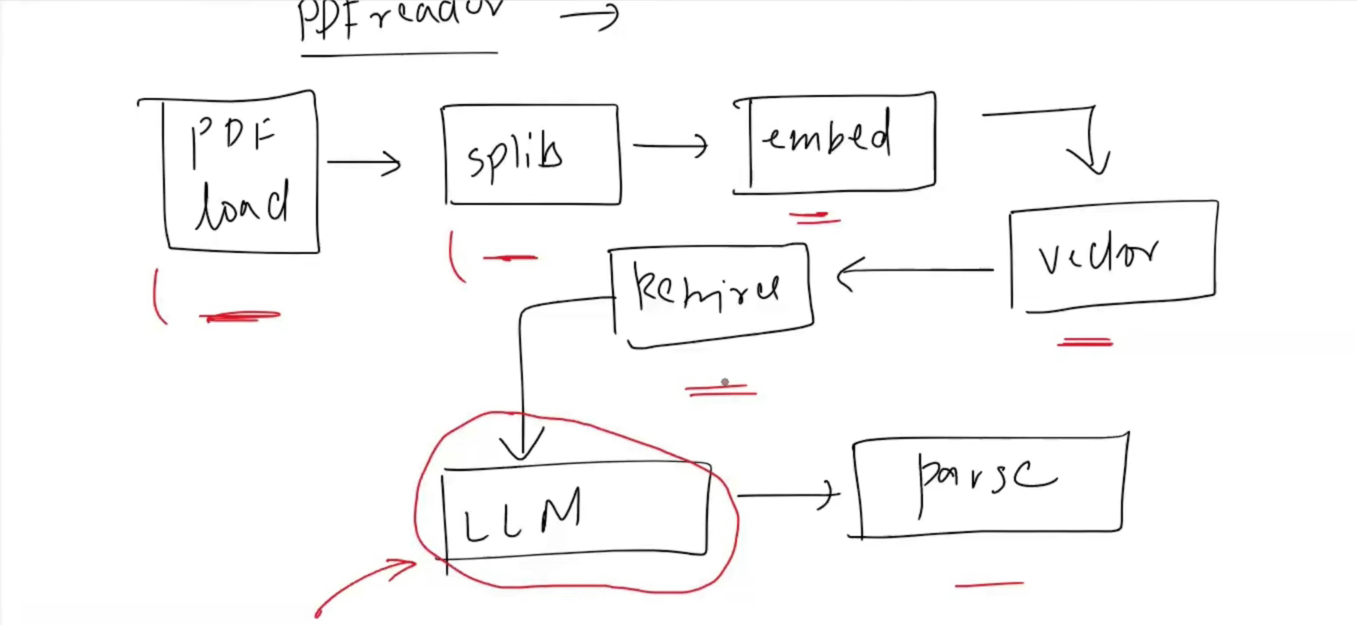

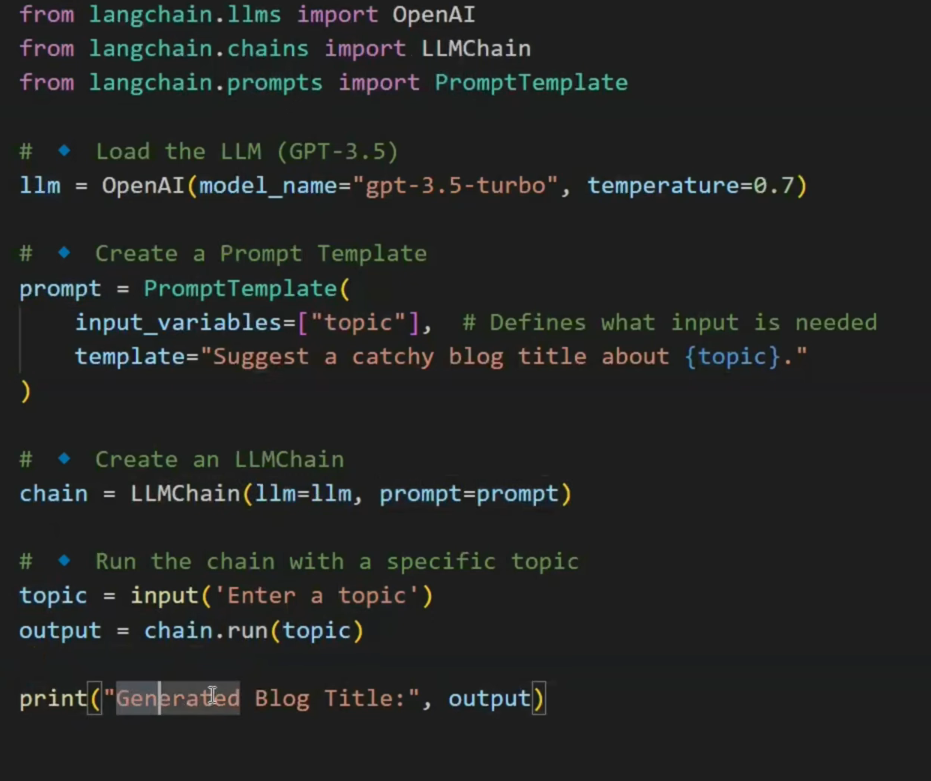

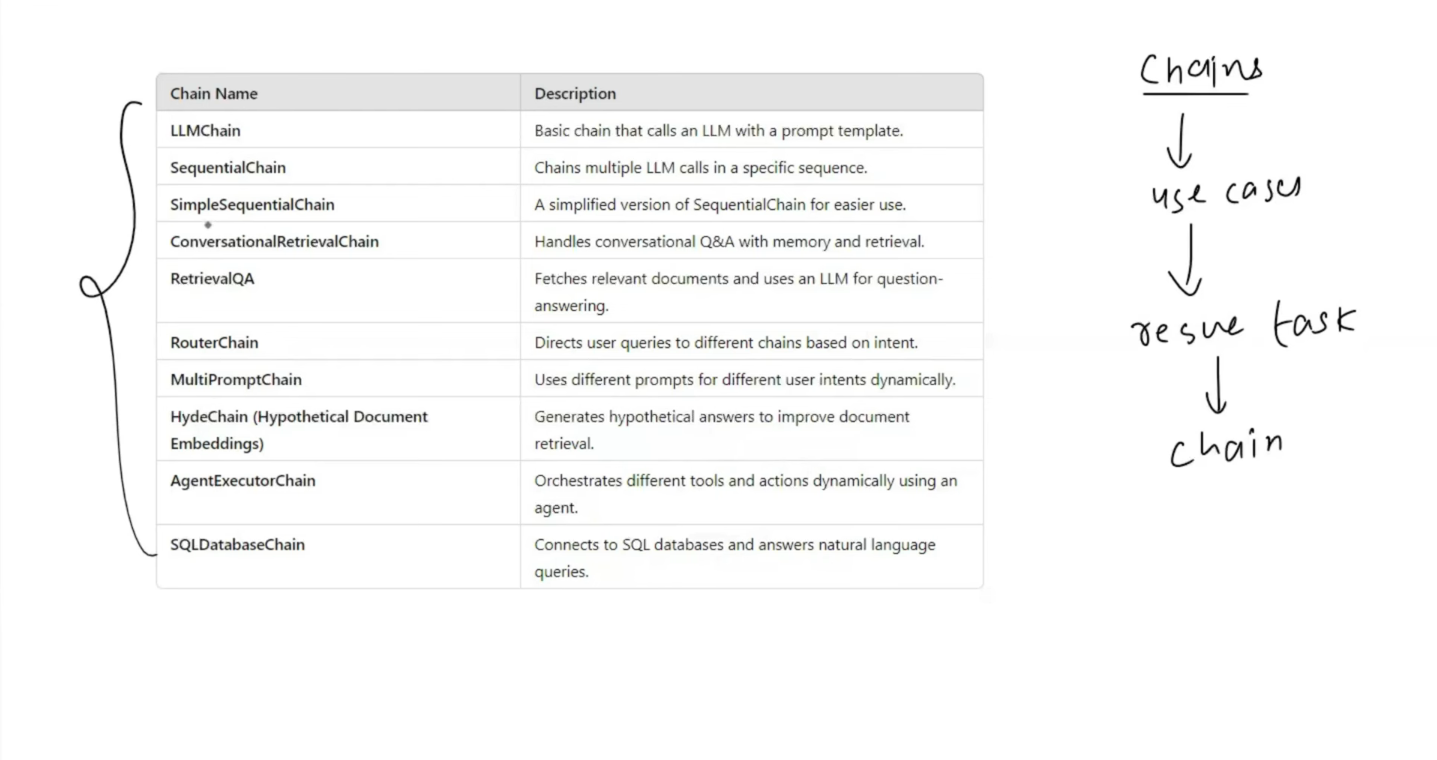

The LangChain team faced several major problems during the development and evolution of their framework, primarily centered on standard faced several major problems during the development and evolution of their framework, primarily centered on standardizing interactions with Large Language Models (LLMs) and managing the complexity introduced by their initial solution, "Chains".

Here are the key problems faced by the LangChain team:

### 1. Initial Challenge: API Incompatibility and Standardization

The first problem LangChain addressed was related to the proliferation of LLM providers:

*   **Diverse LLM Ecosystem:** After the release of ChatGPT around November 2022, many companies like OpenAI, Anthropic, Google, and Mistral began creating their own LLMs.
*   **Incompatible APIs:** The **API of every company behaved differently**.
*   **LangChain's Solution (Initial Goal):** LangChain was created to build a framework that allowed developers to interact with any company's LLM API with minimal code changes, effectively standardizing LLM interaction for developers.

### 2. Challenge of Building Complete LLM Applications

After solving the initial API problem, the team identified that interacting with the LLM API was only a **small part** of building a complete LLM application (like a PDF reader or a chatbot).

*   **Need for Auxiliary Components:** A full LLM application requires many other tasks and components, such as:
    *   Loading documents.
    *   Splitting text into smaller parts.
    *   Generating and storing embeddings in a vector database.
    *   Retrieving relevant text using semantic search.
    *   Parsing the final output for the user.
*   **LangChain's Solution (Components):** LangChain developed helper classes (components) for each of these necessary tasks (e.g., Document Loaders, Text Splitters, Embedding Models, Retrievers, Output Parsers, Memory) to help developers build complex applications.

### 3. The Major Crisis: The Problem of Too Many Chains

The most significant problem emerged after LangChain introduced **Chains** to automate common, reusable workflows (like creating a prompt and sending it to an LLM).

The problem was multi-faceted, stemming from a fundamental lack of standardization among the basic components:

#### A. Lack of Component Standardization (The Root Cause)

The core mistake was that the initial components (LLM, Prompt, Parsers, Retrievers, etc.) were **not standardized**.

*   **Incompatible Interfaces:** These components were developed independently and behaved differently.
*   For example, interacting with the different components required different methods:
    *   The LLM component required the **`predict()`** function.
    *   The Prompt Template component required the **`format()`** function.
    *   The Retriever component required the **`get_relevant_documents()`** function.
    *   Parsers required a **`parse()`** method.
*   **Forced Custom Coding:** Because these component interfaces were incompatible, LangChain was **forced to write custom code or manual functions** (the Chains) every time they wanted to connect two or more components or execute a new workflow. This custom coding led directly to the over-proliferation of Chains.

#### B. Disadvantages of Too Many Chains

Because the team created many Chains to solve every specific use case (e.g., `LLMChain`, `RetrieverQAChain`, Simple Sequential Chain, SQL Chain, API Chain, Math Chain), two major disadvantages arose:

1.  **Massive and Problematic Codebase:** The LangChain codebase became very large and difficult to actively maintain.
2.  **Steep Learning Curve:** New AI engineers struggled to learn LangChain because they were overwhelmed by the sheer number of Chains available and found it difficult to determine which of the 50+ types of Chains to use for a specific scenario. The learning curve became "very steep".

The team realized that their intention to help AI engineers by creating Chains had unintentionally backfired, making the library more complex for new learners.

### The Ultimate Solution Realization

The team finally realized their mistake: to achieve their goal of allowing developers to create flexible workflows like connecting "Lego blocks," they needed to rebuild their components to be standardized and seamlessly connectable. This realization led to the introduction of **Runnables**, which enforce a common interface (like the `invoke()` method) across all components, thus solving the standardization problem that caused the "too many chains" crisis.